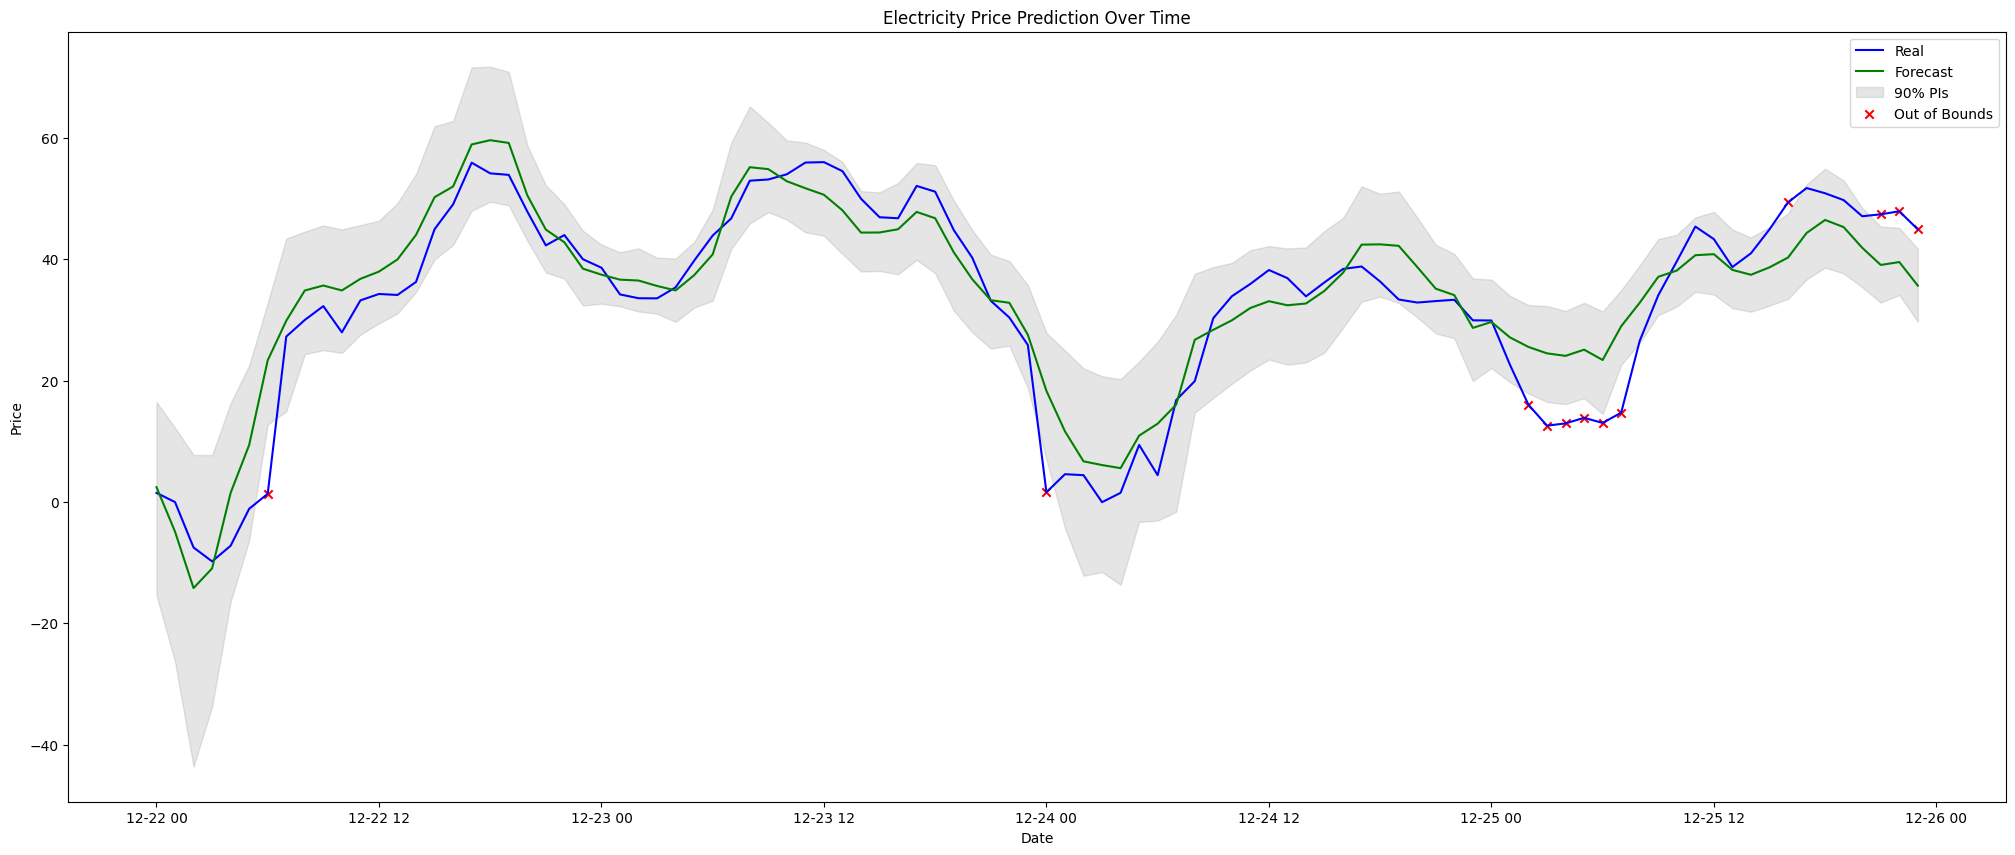

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to the CSV file
csv_file_path = "forecasts_ddnn_1/prediction_ensembled.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file_path, index_col=0)


data = data.iloc[: 24 * 4]

# Convert the index to a DateTime object
data.index = pd.to_datetime(data.index)

# Find the days when the real price is outside the bounds
out_of_bounds_days = data[
    (data["real"] < data["lower_bound_90_ensembled"])
    | (data["real"] > data["upper_bound_90_ensembled"])
]

# Plot the real values, forecast, and 90% Prediction Intervals
plt.figure(figsize=(25, 10))
plt.plot(data["real"], label="Real", color="blue")
plt.plot(data["bound_50_ensembled"], label="median", color="green")
plt.fill_between(
    data.index,
    data["lower_bound_90_ensembled"],
    data["upper_bound_90_ensembled"],
    color="gray",
    alpha=0.2,
    label="90% PIs",
)

# Highlight the out-of-bound days using scatter plot
plt.scatter(
    out_of_bounds_days.index,
    out_of_bounds_days["real"],
    color="red",
    label="Out of Bounds",
    marker="x",
)

plt.title("Electricity Price Prediction Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

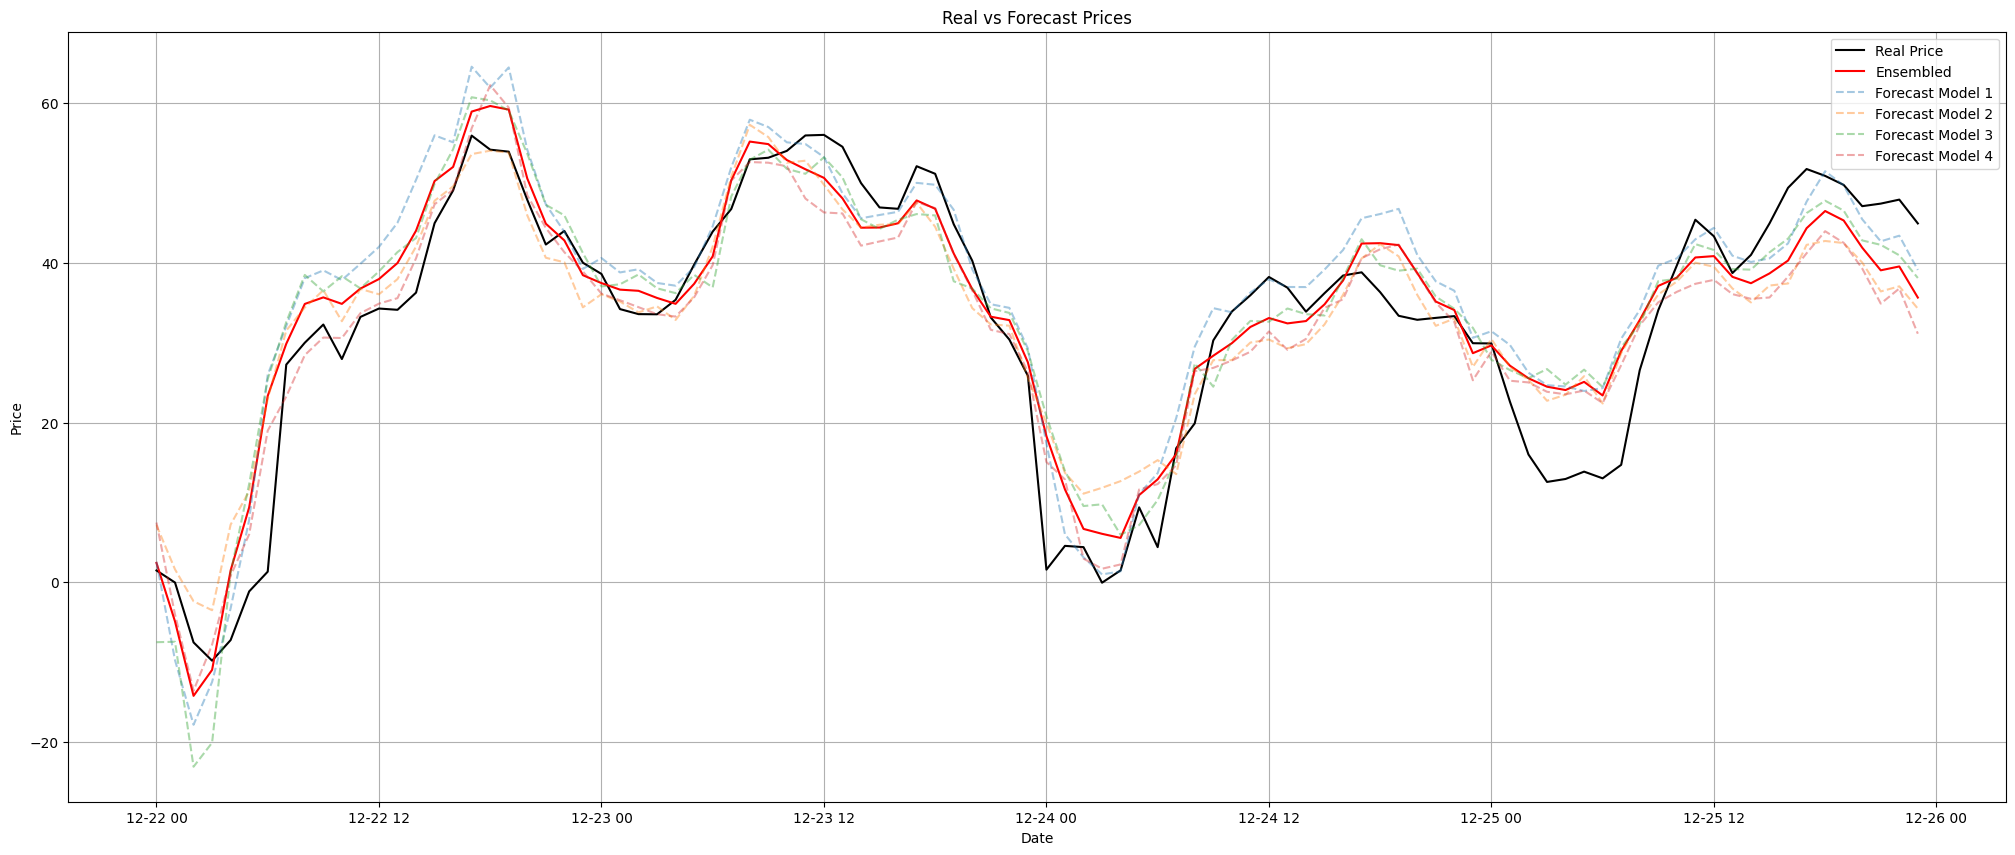

In [50]:
# Plot the real price
plt.figure(figsize=(25, 10))
plt.plot(data['real'], label='Real Price', color='black')
plt.plot(data['forecast_ensembled'], label='Ensembled', color='red')

# Plot the forecasts
for i in range(1, 5):
    # add transparency to the forecasts
    plt.plot(data[f'forecast_m{i}'], label=f'Forecast Model {i}', linestyle='--' ,alpha=0.4)

# Plot the ensembled forecast
# plt.plot(data['forecast_ensembled'], label='Ensembled Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Real vs Forecast Prices')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Print the days and corresponding values
if not out_of_bounds_days.empty:
    print("Days when the real price is outside the 90% Prediction Intervals:", len(data), len(out_of_bounds_days))
    print(out_of_bounds_days)
else:
    print("The real price is within the 90% Prediction Intervals on all days.")




Days when the real price is outside the 90% Prediction Intervals: 96 12
                      real  forecast_m1  forecast_m2  forecast_m3  \
2020-12-22 06:00:00   1.34    25.968918    22.950335    25.443916   
2020-12-24 00:00:00   1.59    17.388485    19.940096    20.814379   
2020-12-25 02:00:00  16.00    26.235369    25.347063    25.551943   
2020-12-25 03:00:00  12.57    24.676113    22.729355    26.691999   
2020-12-25 04:00:00  12.94    24.516445    23.485514    24.746685   
2020-12-25 05:00:00  13.86    23.951744    25.804670    26.622269   
2020-12-25 06:00:00  13.02    24.307598    22.383194    24.434288   
2020-12-25 07:00:00  14.71    30.490791    28.680281    29.442257   
2020-12-25 16:00:00  49.38    42.421356    37.401241    43.014439   
2020-12-25 21:00:00  47.40    42.676601    36.412155    42.239487   
2020-12-25 22:00:00  47.90    43.385799    37.047607    40.932186   
2020-12-25 23:00:00  44.92    39.093681    34.260414    38.092991   

                     forecast_